## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: H1

In [1]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# create a database to store optuna studies with sqlite backend
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [3]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [4]:
cell_line = CELL_LINES[2]
cell_line

'H1'

---

In [5]:
from BIOINF_tesi.data_pipe import Load_Create_Task
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline

In [7]:
from BIOINF_tesi.models import FFNN, CNN, CNN_LSTM
from BIOINF_tesi.models.utils import fit, Param_Search, Kfold_CV, plot_scores

In [7]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [7]:
task = TASKS[0]
task

'active_E_vs_inactive_E'

In [8]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


### 1. FFNN

In [10]:
model=FFNN

In [11]:
# IMBALANCED
type_augm_genfeatures = 'smote'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=True,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:28:51,487] Using an existing study with name 'H1_active_E_vs_inactive_E_FFNN_smote_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.14576348237272108
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.3
    lr: 0.0002792136434678459
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 16
    optimizer: RMSprop
    weight_decay: 0.0027848772546870955

===============> MODEL TESTING


/opt/anaconda3/lib/python3.8/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:28:51,740] Using an existing study with name 'H1_active_E_vs_inactive_E_FFNN_smote_1_2' instead of creating a new one.


AUPRC test score: 0.145671408407845


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  4
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.14033573389992185
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.3
    dropout_l2: 0.0
    dropout_l3: 0.5
    lr: 0.0002710318165159902
    n_layers: 4
    n_units_l0: 64
    n_units_l1: 128
    n_units_l2: 32
    n_units_l3: 16
    optimizer: Adam
    weight_decay: 0.0005439133210530741

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:28:51,987] Using an existing study with name 'H1_active_E_vs_inactive_E_FFNN_smote_1_2_3' instead of creating a new one.


AUPRC test score: 0.13027470138568115


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.14460005426053532
  Params: 
    dropout_l0: 0.4
    lr: 0.00033098226909741813
    n_layers: 1
    n_units_l0: 128
    optimizer: Nadam
    weight_decay: 0.004682740590130223

===============> MODEL TESTING
AUPRC test score: 0.13717944111635122



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.13771


In [12]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

In [14]:
# IMBALANCED
type_augm_genfeatures = 'double'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=True,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:28:52,475] Using an existing study with name 'H1_active_E_vs_inactive_E_FFNN_double_1' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:28:52,579] Using an existing study with name 'H1_active_E_vs_inactive_E_FFNN_double_1_2' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.15334383490341033
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.0
    lr: 1.253072948190913e-05
    n_layers: 2
    n_units_l0: 128
    n_units_l1: 16
    optimizer: Nadam
    weight_decay: 0.0016254301389992494

===============> MODEL TESTING
AUPRC test score: 0.13928131486513817


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.13913836571283802
  Params: 
    dropout_l0: 0.2
    lr: 0.00024924548432218234
    n_layers: 1
    n_units_l0: 128
    optimizer: Nadam
    weight_decay: 0.006280417991924162

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:28:52,678] Using an existing study with name 'H1_active_E_vs_inactive_E_FFNN_double_1_2_3' instead of creating a new one.


AUPRC test score: 0.1372390646023758


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.15177493619535515
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.2
    lr: 0.02100121792008002
    n_layers: 2
    n_units_l0: 64
    n_units_l1: 32
    optimizer: Nadam
    weight_decay: 0.0002659498509965974

===============> MODEL TESTING
AUPRC test score: 0.13038272101745965



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.13563


In [15]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [16]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [10]:
model=CNN

In [11]:
# IMBALANCED
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:29:55,193] Using an existing study with name 'H1_active_E_vs_inactive_E_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/conda/lib/python3.7/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.08179527317984998
  Params: 
    dropout_l0: 0
    dropout_l1: 0.4
    kernel_size_l0: 11
    kernel_size_l1: 11
    lr: 0.00037084149388996534
    n_layers: 2
    optimizer: Adam
    out_channels_l0: 64
    out_channels_l1: 32
    weight_decay: 0.0006719176927490662

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:29:59,156] Using an existing study with name 'H1_active_E_vs_inactive_E_CNN_1_2' instead of creating a new one.


AUPRC test score: 0.09446391184303803


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.07749025719976421
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0
    dropout_l2: 0.5
    kernel_size_l0: 11
    kernel_size_l1: 5
    kernel_size_l2: 11
    lr: 0.03141965086688005
    n_layers: 3
    optimizer: Nadam
    out_channels_l0: 16
    out_channels_l1: 64
    out_channels_l2: 256
    weight_decay: 0.0033601168864284612

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:00,676] Using an existing study with name 'H1_active_E_vs_inactive_E_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.0838460446854811


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.10041655057215332
  Params: 
    dropout_l0: 0
    kernel_size_l0: 15
    lr: 0.00022939999704353107
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 64
    weight_decay: 0.002092547075589785

===============> MODEL TESTING
AUPRC test score: 0.08547311723528751



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.08793


In [12]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [9]:
task = TASKS[1]
task

'active_P_vs_inactive_P'

In [10]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---

### 1. FFNN

In [19]:
model=FFNN

In [20]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:00,086] Using an existing study with name 'H1_active_P_vs_inactive_P_FFNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3241264730308719
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.2
    dropout_l2: 0.0
    lr: 0.009037675517652628
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 16
    n_units_l2: 32
    optimizer: Nadam
    weight_decay: 0.0005520243428649026

===============> MODEL TESTING
AUPRC test score: 0.31619000737035524


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:00,289] Using an existing study with name 'H1_active_P_vs_inactive_P_FFNN_1_2' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:00,388] Using an existing study with name 'H1_active_P_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3032875102016583
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.3
    lr: 0.0002157302945827545
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 16
    optimizer: RMSprop
    weight_decay: 0.006730649826059255

===============> MODEL TESTING
AUPRC test score: 0.30335188810730684


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.31308806893619645
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.3
    lr: 0.0026357951023454206
    n_layers: 2
    n_units_l0: 64
    n_units_l1: 32
    optimizer: Nadam
    weight_decay: 0.0005683050764990382

===============> MODEL TESTING
AUPRC test score: 0.3031252376140562



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.30756


In [21]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [22]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [16]:
model=CNN

In [17]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:10,758] Using an existing study with name 'H1_active_P_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.23017744597538828
  Params: 
    dropout_l0: 0
    kernel_size_l0: 5
    lr: 0.001305312284365018
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 16
    weight_decay: 0.0015421897159120347

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:11,405] Using an existing study with name 'H1_active_P_vs_inactive_P_CNN_1_2' instead of creating a new one.


AUPRC test score: 0.23575019606687897


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1951920881712969
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.4
    dropout_l2: 0.4
    dropout_l3: 0.4
    kernel_size_l0: 11
    kernel_size_l1: 11
    kernel_size_l2: 11
    kernel_size_l3: 5
    lr: 0.0018458575976973916
    n_layers: 4
    optimizer: Nadam
    out_channels_l0: 32
    out_channels_l1: 64
    out_channels_l2: 256
    out_channels_l3: 512
    weight_decay: 0.05013676598838968

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:12,555] Using an existing study with name 'H1_active_P_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.14448365969746457


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.23827857421811827
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    dropout_l2: 0.4
    kernel_size_l0: 15
    kernel_size_l1: 15
    kernel_size_l2: 15
    lr: 0.0007354461638638003
    n_layers: 3
    optimizer: RMSprop
    out_channels_l0: 64
    out_channels_l1: 64
    out_channels_l2: 96
    weight_decay: 0.07467064432119624

===============> MODEL TESTING
AUPRC test score: 0.23725185321525744



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.20583


In [18]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [19]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [11]:
task = TASKS[2]
task

'active_E_vs_active_P'

In [12]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [25]:
model=FFNN

In [26]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:05,519] Using an existing study with name 'H1_active_E_vs_active_P_FFNN_1' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:05,595] Using an existing study with name 'H1_active_E_vs_active_P_FFNN_1_2' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5215143109913623
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.3
    lr: 0.00029092106191520785
    n_layers: 2
    n_units_l0: 64
    n_units_l1: 16
    optimizer: Nadam
    weight_decay: 0.0019222588041376612

===============> MODEL TESTING
AUPRC test score: 0.5289442208837357


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.4584030939785722
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.3
    dropout_l2: 0.5
    lr: 2.5385159580588695e-05
    n_layers: 3
    n_units_l0: 256
    n_units_l1: 128
    n_units_l2: 16
    optimizer: Adam
    weight_decay: 0.00010734867803985216

===============> MODEL TESTING
AUPRC test score: 0.54377016112788

In [27]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [28]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [22]:
model=CNN

In [23]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:13,771] Using an existing study with name 'H1_active_E_vs_active_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3478539723897965
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    dropout_l2: 0
    dropout_l3: 0.5
    kernel_size_l0: 15
    kernel_size_l1: 11
    kernel_size_l2: 15
    kernel_size_l3: 15
    lr: 0.0059154231756171185
    n_layers: 4
    optimizer: RMSprop
    out_channels_l0: 16
    out_channels_l1: 64
    out_channels_l2: 96
    out_channels_l3: 512
    weight_decay: 0.0006566119816860283

===============> MODEL TESTING
AUPRC test score: 0.28936241265823115




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:15,060] Using an existing study with name 'H1_active_E_vs_active_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5052224289076657
  Params: 
    dropout_l0: 0.4
    kernel_size_l0: 5
    lr: 0.00017501972271524198
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 64
    weight_decay: 0.008155021929064591

===============> MODEL TESTING
AUPRC test score: 0.45298789950590673




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:17,066] Using an existing study with name 'H1_active_E_vs_active_P_CNN_1_2_3' instead of creating a new one.


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5188709692660443
  Params: 
    dropout_l0: 0
    dropout_l1: 0.4
    dropout_l2: 0
    kernel_size_l0: 5
    kernel_size_l1: 15
    kernel_size_l2: 15
    lr: 3.068070235573535e-05
    n_layers: 3
    optimizer: RMSprop
    out_channels_l0: 64
    out_channels_l1: 32
    out_channels_l2: 64
    weight_decay: 0.007348664365257706

===============> MODEL TESTING
AUPRC test score: 0.40603984218842015



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.3828


In [24]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [25]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [13]:
task = TASKS[3]
task

'inactive_E_vs_inactive_P'

In [14]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [31]:
model=FFNN

In [32]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:08,892] Using an existing study with name 'H1_inactive_E_vs_inactive_P_FFNN_1' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:09,020] Using an existing study with name 'H1_inactive_E_vs_inactive_P_FFNN_1_2' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5539316174877712
  Params: 
    dropout_l0: 0.3
    lr: 1.963841167728838e-05
    n_layers: 1
    n_units_l0: 64
    optimizer: RMSprop
    weight_decay: 0.0004610935638552295

===============> MODEL TESTING
AUPRC test score: 0.5539860189418125


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:09,146] Using an existing study with name 'H1_inactive_E_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.580835764183374
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.2
    dropout_l2: 0.0
    dropout_l3: 0.4
    lr: 7.226344950264085e-05
    n_layers: 4
    n_units_l0: 32
    n_units_l1: 128
    n_units_l2: 16
    n_units_l3: 32
    optimizer: Nadam
    weight_decay: 0.0001457182751477659

===============> MODEL TESTING
AUPRC test score: 0.587158240612605


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5840213111118733
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.3
    dropout_l2: 0.0
    lr: 0.03678382860526816
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 64
    n_units_l2: 4
    optimizer: Nadam
    weight_decay: 0.0001407247077991582

===============> MODEL TESTING
AUPRC test score: 0.5780

In [33]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [34]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [28]:
model=CNN

In [29]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:27,656] Using an existing study with name 'H1_inactive_E_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5906147499767491
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 5
    lr: 9.533322987220707e-05
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 64
    weight_decay: 0.00021361270984194695

===============> MODEL TESTING
AUPRC test score: 0.5965113316357926




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:29,800] Using an existing study with name 'H1_inactive_E_vs_inactive_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5915159020269791
  Params: 
    dropout_l0: 0.4
    kernel_size_l0: 11
    lr: 0.0003084204055918163
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 32
    weight_decay: 0.0017347353420981467

===============> MODEL TESTING
AUPRC test score: 0.59905114724192




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:30,888] Using an existing study with name 'H1_inactive_E_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5915163638098814
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0
    kernel_size_l0: 11
    kernel_size_l1: 5
    lr: 0.00021893076906318785
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 64
    out_channels_l1: 96
    weight_decay: 0.0022261353513455687

===============> MODEL TESTING
AUPRC test score: 0.6049690159073382



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.60018


In [30]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [31]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [15]:
task = TASKS[4]
task

'active_EP_vs_inactive_rest'

In [16]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [37]:
model=FFNN

In [38]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:13,116] Using an existing study with name 'H1_active_EP_vs_inactive_rest_FFNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2675668768085411
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.2
    lr: 0.05534607967855561
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 128
    optimizer: Adam
    weight_decay: 0.012774346316148447

===============> MODEL TESTING
AUPRC test score: 0.2690144139939069




/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:13,318] Using an existing study with name 'H1_active_EP_vs_inactive_rest_FFNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2673123279054717
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.2
    lr: 0.00015746420748457833
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 16
    optimizer: Nadam
    weight_decay: 0.0020966559930635058

===============> MODEL TESTING
AUPRC test score: 0.26152603458960505


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:13,457] Using an existing study with name 'H1_active_EP_vs_inactive_rest_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.27797629861424483
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.2
    dropout_l2: 0.0
    dropout_l3: 0.0
    lr: 0.0003338933709186161
    n_layers: 4
    n_units_l0: 128
    n_units_l1: 16
    n_units_l2: 4
    n_units_l3: 16
    optimizer: Adam
    weight_decay: 0.0027890642111254786

===============> MODEL TESTING
AUPRC test score: 0.09906993116395493



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.20987


In [39]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [40]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [34]:
model=CNN

In [35]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:49,569] Using an existing study with name 'H1_active_EP_vs_inactive_rest_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.19025460386596507
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 5
    lr: 0.02930283999526681
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 32
    weight_decay: 0.0911411644777138

===============> MODEL TESTING
AUPRC test score: 0.10260241596638651


>>> ITERATION N. 2


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:50,661] Using an existing study with name 'H1_active_EP_vs_inactive_rest_CNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2197242637444077
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.4
    dropout_l2: 0
    kernel_size_l0: 5
    kernel_size_l1: 15
    kernel_size_l2: 5
    lr: 0.0007198937032962331
    n_layers: 3
    optimizer: Nadam
    out_channels_l0: 32
    out_channels_l1: 64
    out_channels_l2: 64
    weight_decay: 0.0003509781566714243

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:30:51,375] Using an existing study with name 'H1_active_EP_vs_inactive_rest_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.2097615260437875


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.20539276027044118
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.5
    dropout_l2: 0.4
    kernel_size_l0: 5
    kernel_size_l1: 11
    kernel_size_l2: 11
    lr: 0.0007265463363410625
    n_layers: 3
    optimizer: Nadam
    out_channels_l0: 64
    out_channels_l1: 96
    out_channels_l2: 96
    weight_decay: 0.01526306342875737

===============> MODEL TESTING
AUPRC test score: 0.2109952376884969



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.17445


In [36]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [37]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

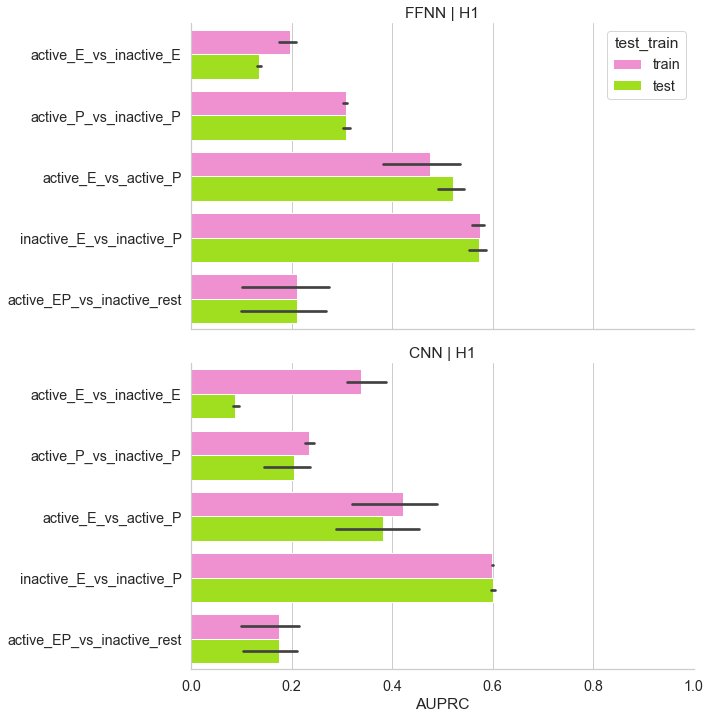

In [8]:
plot_scores(cells=cell_line, models=['FFNN','CNN'])